# Si111 simple XRAYLIB/DABAX comparison

In [37]:
#
#
# This example shows the diffraction by a Si 111 crystal calculated in its simplest implementation
# and compares the results using xrayly and dabax.
# It also compares the calculation time.
# Note the differences in computing time using dabax:
#    it is very slow if using it in an iterative way
#    it is much faster when using the vector capabilities (accelerated).
#
#  Xraylib is always faster than dabax. 
#

import numpy

from crystalpy.diffraction.GeometryType import BraggDiffraction
from crystalpy.diffraction.DiffractionSetupXraylib import DiffractionSetupXraylib
from crystalpy.diffraction.DiffractionSetupDabax import DiffractionSetupDabax
from crystalpy.diffraction.Diffraction import Diffraction

from crystalpy.util.Vector import Vector
from crystalpy.util.Photon import Photon
from crystalpy.diffraction.PerfectCrystalDiffraction import PerfectCrystalDiffraction

from dabax.dabax_xraylib import DabaxXraylib

import time


In [38]:
#
def calculate_simple_diffraction_angular_scan(calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int

    diffraction_setup_dabax = DiffractionSetupDabax(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0,
                                               dabax=DabaxXraylib())                              # radians


    energy                 = 8000.0                           # eV
    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 50

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    #
    # gets Bragg angle needed to create deviation's scan
    #
    bragg_angle = diffraction_setup.angleBragg(energy)

    print("Bragg angle for E=%f eV is %f deg"%(energy,bragg_angle*180.0/numpy.pi))


    # Create a Diffraction object (the calculator)
    diffraction = Diffraction()
    diffraction_dabax = Diffraction()

    # initialize arrays for storing outputs
    deviations = numpy.zeros(angle_deviation_points)
    intensityS = numpy.zeros(angle_deviation_points)
    intensityP = numpy.zeros(angle_deviation_points)
    intensityS_dabax = numpy.zeros(angle_deviation_points)
    intensityP_dabax = numpy.zeros(angle_deviation_points)

    t0 = time.time()
    for ia in range(angle_deviation_points):
        deviation = angle_deviation_min + ia * angle_step
        angle = deviation  + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup, photon)

        # store results
        deviations[ia] = deviation
        intensityS[ia] = numpy.abs(coeffs['S'])**2 # coeffs['S'].intensity()
        intensityP[ia] = numpy.abs(coeffs['P'])**2 # coeffs['P'].intensity()
    t1 = time.time()

    for ia in range(angle_deviation_points):
        deviation = angle_deviation_min + ia * angle_step
        angle = deviation  + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs_dabax = diffraction_dabax.calculateDiffractedComplexAmplitudes(diffraction_setup_dabax,
                                    photon, calculation_method=calculation_method)

        # store results
        deviations[ia] = deviation
        intensityS_dabax[ia] = numpy.abs(coeffs_dabax['S'])**2 # coeffs_dabax['S'].intensity()
        intensityP_dabax[ia] = numpy.abs(coeffs_dabax['P'])**2 # coeffs_dabax['P'].intensity()
    t2 = time.time()

    # plot results
    import matplotlib.pylab as plt
    plt.plot(1e6*deviations,intensityS)
    plt.plot(1e6*deviations,intensityP)
    plt.plot(1e6*deviations,intensityS_dabax)
    plt.plot(1e6*deviations,intensityP_dabax)
    plt.xlabel("deviation angle [urad]")
    plt.ylabel("Reflectivity")
    plt.legend(["Sigma-polarization XRAYLIB","Pi-polarization XRAYLIB","Sigma-polarization DABAX","Pi-polarization DABAX"])
    plt.show()
    print("Total time, Time per point XRAYLIB: ", t1-t0, (t1-t0) / angle_deviation_points)
    print("Total time, Time per point DABAX: ", t2-t1, (t2-t1) / angle_deviation_points)



In [39]:
def calculate_simple_diffraction_angular_scan_accelerated(calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int


    diffraction_setup_dabax = DiffractionSetupDabax(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0,
                                               dabax=DabaxXraylib())                              # radians


    energy                 = 8000.0                           # eV
    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 50

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    #
    # gets Bragg angle needed to create deviation's scan
    #
    bragg_angle = diffraction_setup.angleBragg(energy)

    print("Bragg angle for E=%f eV is %f deg"%(energy,bragg_angle*180.0/numpy.pi))


    # Create a Diffraction object (the calculator)
    diffraction = Diffraction()
    diffraction_dabax = Diffraction()

    # initialize arrays for storing outputs
    deviations = numpy.zeros(angle_deviation_points)
    intensityS = numpy.zeros(angle_deviation_points)
    intensityP = numpy.zeros(angle_deviation_points)
    intensityS_dabax = numpy.zeros(angle_deviation_points)
    intensityP_dabax = numpy.zeros(angle_deviation_points)

    t0 = time.time()
    for ia in range(angle_deviation_points):
        deviation = angle_deviation_min + ia * angle_step
        angle = deviation  + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup, photon,
                                            calculation_method=calculation_method)

        # store results
        deviations[ia] = deviation
        intensityS[ia] = numpy.abs(coeffs['S']) ** 2
        intensityP[ia] = numpy.abs(coeffs['P']) ** 2

    psi_0, psi_H, psi_H_bar = diffraction_setup_dabax.psiAll(energy)
    t1 = time.time()

    for ia in range(angle_deviation_points):
        deviation = angle_deviation_min + ia * angle_step
        angle = deviation  + bragg_angle

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(angle)
        zz = - numpy.abs(numpy.sin(angle))
        photon = Photon(energy_in_ev=energy,direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        # coeffs_dabax = diffraction_dabax.calculateDiffractedComplexAmplitudes(diffraction_setup_dabax, photon)
        #
        # # store results
        # deviations[ia] = deviation
        # intensityS_dabax[ia] = coeffs_dabax['S'].intensity()
        # intensityP_dabax[ia] = coeffs_dabax['P'].intensity()


        # Create PerfectCrystalDiffraction instance.
        perfect_crystal = PerfectCrystalDiffraction(geometry_type=diffraction_setup_dabax.geometryType(),
                                                    bragg_normal=diffraction_setup_dabax.vectorH(),
                                                    surface_normal=diffraction_setup_dabax.vectorNormalSurface(),
                                                    bragg_angle=diffraction_setup_dabax.angleBragg(energy),
                                                    psi_0=psi_0,
                                                    psi_H=psi_H,
                                                    psi_H_bar=psi_H_bar,
                                                    thickness=diffraction_setup_dabax.thickness(),
                                                    d_spacing=diffraction_setup_dabax.dSpacing() * 1e-10)

        complex_amplitudes = perfect_crystal.calculateDiffraction(photon, calculation_method=calculation_method)

        deviations[ia] = deviation
        intensityS_dabax[ia] = numpy.abs(complex_amplitudes['S']) ** 2  # 0.0 # coeffs_dabax['S'].intensity()
        intensityP_dabax[ia] = numpy.abs(complex_amplitudes['P']) ** 2  # 0.0 # coeffs_dabax['P'].intensity()
    t2 = time.time()

    # plot results
    import matplotlib.pylab as plt
    plt.plot(1e6*deviations,intensityS)
    plt.plot(1e6*deviations,intensityP)
    plt.plot(1e6*deviations,intensityS_dabax)
    plt.plot(1e6*deviations,intensityP_dabax)
    plt.xlabel("deviation angle [urad]")
    plt.ylabel("Reflectivity")
    plt.legend(["Sigma-polarization XRAYLIB","Pi-polarization XRAYLIB","Sigma-polarization DABAX","Pi-polarization DABAX"])
    plt.show()
    print("Total time, Time per point XRAYLIB: ", t1-t0, (t1-t0) / angle_deviation_points)
    print("Total time, Time per point DABAX: ", t2-t1, (t2-t1) / angle_deviation_points)

In [40]:
def calculate_simple_diffraction_energy_scan(calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int


    diffraction_setup_dabax = DiffractionSetupDabax(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0,
                                               dabax=DabaxXraylib())                              # radians


    energy                 = 8000.0                           # eV


    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 50

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    #
    # gets Bragg angle needed to create deviation's scan
    #
    bragg_angle_corrected = diffraction_setup.angleBraggCorrected(energy)

    print("Bragg angle corrected for E=%f eV is %f deg"%(energy,bragg_angle_corrected*180.0/numpy.pi))


    DeltaE = energy * 1e-4

    npoints = 100
    energies = numpy.linspace(energy-3*DeltaE, energy+3*DeltaE, npoints)

    # Create a Diffraction object (the calculator)
    diffraction = Diffraction()
    diffraction_dabax = Diffraction()

    # initialize arrays for storing outputs
    intensityS =       numpy.zeros(npoints)
    intensityP =       numpy.zeros(npoints)
    intensityS_dabax = numpy.zeros(npoints)
    intensityP_dabax = numpy.zeros(npoints)


    t0 = time.time()
    for ia in range(npoints):

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(bragg_angle_corrected)
        zz = - numpy.abs(numpy.sin(bragg_angle_corrected))
        photon = Photon(energy_in_ev=energies[ia],direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup, photon,
                                                                  calculation_method=calculation_method)

        # store results
        intensityS[ia] = numpy.abs(coeffs['S'])**2 # coeffs['S'].intensity()
        intensityP[ia] = numpy.abs(coeffs['P'])**2 # coeffs['P'].intensity()


    t1 = time.time()
    for ia in range(npoints):

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(bragg_angle_corrected)
        zz = - numpy.abs(numpy.sin(bragg_angle_corrected))
        photon = Photon(energy_in_ev=energies[ia],direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs_dabax = diffraction_dabax.calculateDiffractedComplexAmplitudes(diffraction_setup_dabax,
                                                    photon, calculation_method=calculation_method)

        # store results
        intensityS_dabax[ia] = numpy.abs(coeffs_dabax['S'])**2 # coeffs_dabax['S'].intensity()
        intensityP_dabax[ia] = numpy.abs(coeffs_dabax['P'])**2 # coeffs_dabax['P'].intensity()

    t2 = time.time()

    # plot results
    import matplotlib.pylab as plt
    plt.plot(energies,intensityS)
    plt.plot(energies,intensityP)
    plt.plot(energies,intensityS_dabax)
    plt.plot(energies,intensityP_dabax)
    plt.xlabel("photon energy [eV]")
    plt.ylabel("Reflectivity")
    plt.legend(["Sigma-polarization XRAYLIB","Pi-polarization XRAYLIB","Sigma-polarization DABAX","Pi-polarization DABAX"])
    plt.show()

    print("Total time, Time per point XRAYLIB: ", t1-t0, (t1-t0) / npoints)
    print("Total time, Time per point DABAX: ", t2-t1, (t2-t1) / npoints)

In [41]:
def calculate_simple_diffraction_energy_scan_accelerated(calculation_method=0):

    # Create a diffraction setup.

    print("\nCreating a diffraction setup...")
    diffraction_setup = DiffractionSetupXraylib(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0)                              # radians                            # int


    diffraction_setup_dabax = DiffractionSetupDabax(geometry_type          = BraggDiffraction(),  # GeometryType object
                                               crystal_name           = "Si",                             # string
                                               thickness              = 1e-2,                             # meters
                                               miller_h               = 1,                                # int
                                               miller_k               = 1,                                # int
                                               miller_l               = 1,                                # int
                                               asymmetry_angle        = 0,#10.0*numpy.pi/180.,                              # radians
                                               azimuthal_angle        = 0.0,
                                               dabax=DabaxXraylib())                              # radians


    energy                 = 8000.0                           # eV


    angle_deviation_min    = -100e-6                          # radians
    angle_deviation_max    = 100e-6                           # radians
    angle_deviation_points = 50

    angle_step = (angle_deviation_max-angle_deviation_min)/angle_deviation_points

    #
    # gets Bragg angle needed to create deviation's scan
    #
    bragg_angle_corrected = diffraction_setup.angleBraggCorrected(energy)

    print("Bragg angle corrected for E=%f eV is %f deg"%(energy,bragg_angle_corrected*180.0/numpy.pi))


    DeltaE = energy * 1e-4

    npoints = 100
    energies = numpy.linspace(energy-3*DeltaE, energy+3*DeltaE, npoints)

    # Create a Diffraction object (the calculator)
    diffraction = Diffraction()
    diffraction_dabax = Diffraction()

    # initialize arrays for storing outputs
    intensityS =       numpy.zeros(npoints)
    intensityP =       numpy.zeros(npoints)
    intensityS_dabax = numpy.zeros(npoints)
    intensityP_dabax = numpy.zeros(npoints)


    t0 = time.time()
    for ia in range(npoints):

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(bragg_angle_corrected)
        zz = - numpy.abs(numpy.sin(bragg_angle_corrected))
        photon = Photon(energy_in_ev=energies[ia],direction_vector=Vector(0.0,yy,zz))

        # perform the calculation
        coeffs = diffraction.calculateDiffractedComplexAmplitudes(diffraction_setup, photon, calculation_method=calculation_method)

        # store results
        intensityS[ia] = numpy.abs(coeffs['S']) ** 2
        intensityP[ia] = numpy.abs(coeffs['P']) ** 2



    COOR = []
    ENER = []
    for ia in range(npoints):

        # calculate the components of the unitary vector of the incident photon scan
        # Note that diffraction plane is YZ
        yy = numpy.cos(bragg_angle_corrected)
        zz = - numpy.abs(numpy.sin(bragg_angle_corrected))

        COOR.append([0.0,yy,zz])
        ENER.append(energies[ia])


    t1 = time.time()

    Psi_0, Psi_H, Psi_H_bar = diffraction_setup_dabax.psiAll(ENER)

    for ia in range(npoints):
        # perform the calculation
        incoming_photon = Photon(energy_in_ev=ENER[ia],direction_vector=Vector(COOR[ia][0],COOR[ia][1],COOR[ia][2]))
        energy = ENER[ia]

        # psi_0, psi_H, psi_H_bar = diffraction_setup_dabax.psiAll(energy)
        psi_0, psi_H, psi_H_bar = Psi_0[ia], Psi_H[ia], Psi_H_bar[ia]

        # Create PerfectCrystalDiffraction instance.
        perfect_crystal = PerfectCrystalDiffraction(geometry_type=diffraction_setup_dabax.geometryType(),
                                                    bragg_normal=diffraction_setup_dabax.vectorH(),
                                                    surface_normal=diffraction_setup_dabax.vectorNormalSurface(),
                                                    bragg_angle=diffraction_setup_dabax.angleBragg(energy),
                                                    psi_0=psi_0,
                                                    psi_H=psi_H,
                                                    psi_H_bar=psi_H_bar,
                                                    thickness=diffraction_setup_dabax.thickness(),
                                                    d_spacing=diffraction_setup_dabax.dSpacing() * 1e-10)

        complex_amplitudes = perfect_crystal.calculateDiffraction(incoming_photon, calculation_method=calculation_method)

        intensityS_dabax[ia] = numpy.abs(complex_amplitudes['S']) ** 2 # 0.0 # coeffs_dabax['S'].intensity()
        intensityP_dabax[ia] = numpy.abs(complex_amplitudes['P']) ** 2 # 0.0 # coeffs_dabax['P'].intensity()

    t2 = time.time()

    # plot results
    import matplotlib.pylab as plt
    plt.plot(energies,intensityS)
    plt.plot(energies,intensityP)
    plt.plot(energies,intensityS_dabax)
    plt.plot(energies,intensityP_dabax)
    plt.xlabel("photon energy [eV]")
    plt.ylabel("Reflectivity")
    plt.legend(["Sigma-polarization XRAYLIB","Pi-polarization XRAYLIB","Sigma-polarization DABAX","Pi-polarization DABAX"])
    plt.show()

    print("Total time, Time per point XRAYLIB: ", t1-t0, (t1-t0) / npoints)
    print("Total time, Time per point DABAX: ", t2-t1, (t2-t1) / npoints)

In [42]:
calculation_method = 0 # 0=Zachariasen, 1=Guigay


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg


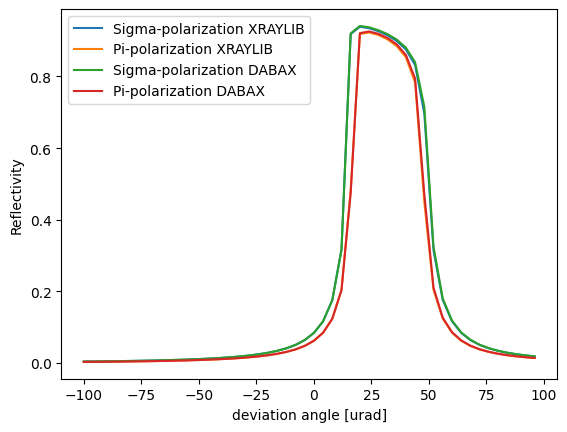

Total time, Time per point XRAYLIB:  0.06263375282287598 0.0012526750564575196
Total time, Time per point DABAX:  3.438784122467041 0.06877568244934082


In [43]:
calculate_simple_diffraction_angular_scan(calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle for E=8000.000000 eV is 14.308608 deg


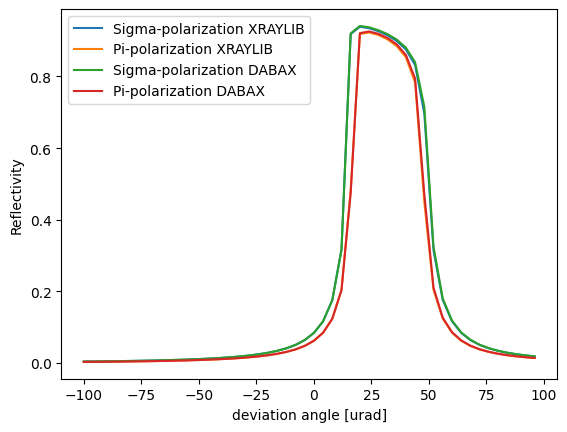

Total time, Time per point XRAYLIB:  0.18636846542358398 0.0037273693084716795
Total time, Time per point DABAX:  0.12251663208007812 0.0024503326416015626


In [44]:
calculate_simple_diffraction_angular_scan_accelerated(calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle corrected for E=8000.000000 eV is 14.310444 deg


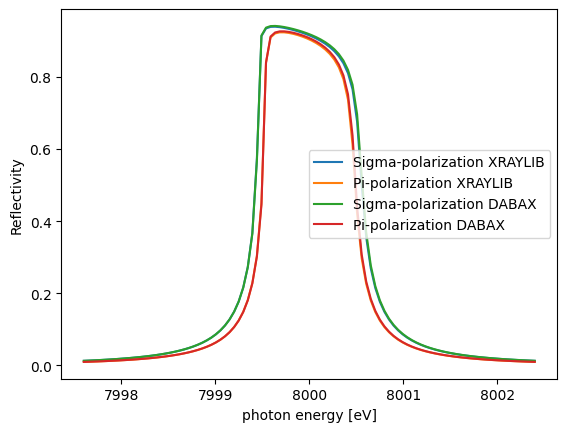

Total time, Time per point XRAYLIB:  0.1244194507598877 0.001244194507598877
Total time, Time per point DABAX:  6.905432939529419 0.06905432939529418


In [45]:
calculate_simple_diffraction_energy_scan(calculation_method=calculation_method)


Creating a diffraction setup...
Bragg angle corrected for E=8000.000000 eV is 14.310444 deg


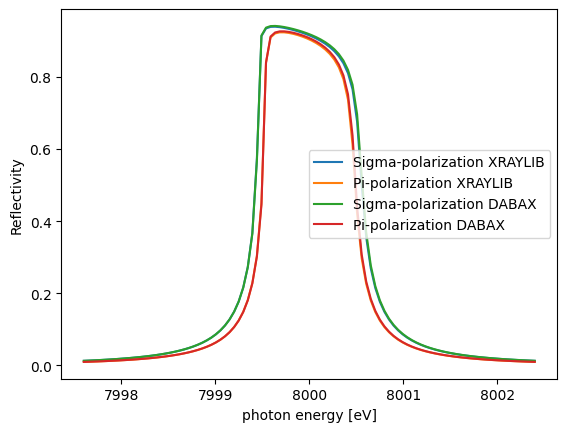

Total time, Time per point XRAYLIB:  0.1411433219909668 0.0014114332199096679
Total time, Time per point DABAX:  0.23798179626464844 0.0023798179626464844


In [46]:
calculate_simple_diffraction_energy_scan_accelerated(calculation_method=calculation_method)